In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

# siehe Hilfscode.py
from Hilfscode import draw_piechart
from Hilfscode import cat_compare
from Hilfscode import lorenz

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
# app_train["TARGET"].replace(
#     {
#         0: "Payback",
#         1: "Default"
#     }, inplace = True
# )

In [5]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]

In [6]:
head = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

In [7]:
app_train[head+ ["TARGET"]].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.083037,0.262949,0.139376,1
1,0.311267,0.622246,NaN,0
2,NaN,0.555912,0.729567,0
3,NaN,0.650442,NaN,0
4,NaN,0.322738,NaN,0


In [8]:
len(app_train)

307511

In [9]:
X = app_train[head + ["TARGET"]]
X = X.dropna()

In [10]:
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

In [11]:
x.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
6,0.774761,0.724000,0.492060
8,0.587334,0.205747,0.751724
10,0.319760,0.651862,0.363945
11,0.722044,0.555183,0.652897


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
reg = LogisticRegression().fit(x, y)

In [14]:
len(x.columns)

3

In [15]:
n = len(X)
p = len(x.columns)

r2 = reg.score(x, y)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

print(r2)
print(r2_adj)
print(p)
print(n)

0.927054722645521
0.9270527256949159
3
109589


In [16]:
features = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'DAYS_ID_PUBLISH',
 'FLAG_DOCUMENT_3',
 'LIVINGAREA_AVG',
 'REGION_RATING_CLIENT',
 'APARTMENTS_AVG',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_ANNUITY',
 'FLAG_EMP_PHONE',
 'DAYS_REGISTRATION',
 'OCCUPATION_TYPE',
 'FLOORSMAX_AVG',
 'OWN_CAR_AGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ORGANIZATION_TYPE',
 'REG_CITY_NOT_LIVE_CITY',
 'ELEVATORS_AVG',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'BASEMENTAREA_AVG',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ENTRANCES_AVG',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'LANDAREA_AVG',
 'YEARS_BUILD_AVG',
 'LIVINGAPARTMENTS_AVG',
 'CNT_FAM_MEMBERS',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'COMMONAREA_AVG',
 'NONLIVINGAREA_AVG',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_FAMILY_STATUS',
 'NONLIVINGAPARTMENTS_AVG',
 'EMERGENCYSTATE_MODE',
 'HOUSETYPE_MODE',
 'FLOORSMIN_AVG',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'FLAG_WORK_PHONE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FONDKAPREMONT_MODE',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_5',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_15',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_13',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12']

In [17]:
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
heads = [head for head in features if head in m_heads]
heads

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'LIVINGAREA_AVG',
 'APARTMENTS_AVG',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION',
 'FLOORSMAX_AVG',
 'OWN_CAR_AGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'HOUR_APPR_PROCESS_START',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'BASEMENTAREA_AVG',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ENTRANCES_AVG',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'LANDAREA_AVG',
 'YEARS_BUILD_AVG',
 'LIVINGAPARTMENTS_AVG',
 'CNT_FAM_MEMBERS',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN',
 'COMMONAREA_AVG',
 'NONLIVINGAREA_AVG',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

In [19]:
data = {
        "r2":[],
        "r2_adj":[],
        "p" : [],
        "n": []
       }

for t in range(len(heads)):
    X = app_train[heads[:t+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    reg = LogisticRegression(max_iter=500).fit(x, y)
    n = len(X)
    p = len(x.columns)

    r2 = reg.score(x, y)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

    data["r2"].append(r2)
    data["r2_adj"].append(r2_adj)
    data["p"].append(p)
    data["n"].append(n)

In [20]:
df = pd.DataFrame(data)

          r2    r2_adj   p      n
23  0.942034  0.941951  24  16734


<AxesSubplot:>

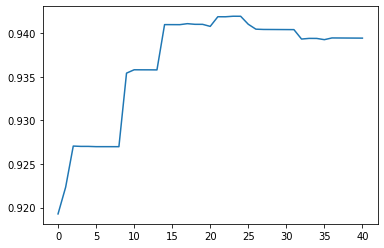

In [21]:
print(df[df["r2_adj"] == df["r2_adj"].max()])
df["r2_adj"].plot()

In [22]:
y = app_train["TARGET"]
x = app_train[heads]

In [23]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.6261290133029263
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.6242306750866855
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.6161477411477411
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.6226457986712526
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.6211608529283854


Durchschnitt: 0.62
Standardabw.: 0.00
Varianz:      0.00


#### Stammdaten + Bureaudaten

In [24]:
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")

In [25]:
m_heads = [head for head in bureau.columns if bureau[head].dtype.name != "object"]
n_heads = [head for head in bureau.columns if bureau[head].dtype.name == "object"]

In [26]:
keys = ["SK_ID_CURR", "SK_ID_BUREAU"]
m_heads = [element for element in m_heads if element not in keys]

In [27]:
quants = [0, 0.25, 0.5, 0.75, 1]

for index, head in enumerate(m_heads):
    
    df = bureau[["SK_ID_CURR", head]]
    df = df.groupby(by = ["SK_ID_CURR"]).quantile(quants)
    df = df.unstack(level=-1)
    
    try:
        mets = mets.join(df , on = "SK_ID_CURR")
    except (ValueError, NameError):
        mets = df

In [28]:
mets.head()

DAYS_CREDIT                                CREDIT_DAY_OVERDUE       \
                  0.00    0.25    0.50    0.75   1.00               0.00 0.25   
SK_ID_CURR                                                                      
100001         -1572.0  -894.0  -857.0 -439.50  -49.0                0.0  0.0   
100002         -1437.0 -1122.0 -1042.5 -602.75 -103.0                0.0  0.0   
100003         -2586.0 -1873.5 -1205.5 -732.75 -606.0                0.0  0.0   
100004         -1326.0 -1096.5  -867.0 -637.50 -408.0                0.0  0.0   
100005          -373.0  -255.0  -137.0  -99.50  -62.0                0.0  0.0   

                          DAYS_CREDIT_ENDDATE                                  \
           0.50 0.75 1.00                0.00     0.25   0.50    0.75    1.00   
SK_ID_CURR                                                                      
100001      0.0  0.0  0.0             -1329.0  -503.00 -179.0  656.50  1778.0   
100002      0.0  0.0  0.0             -1072.0 -1006.25 -424.5   79.25   780.0   
100003      0.0  0.0  0.0             -2434.0 -1013.50 -480.0  -11.00  1216.0   
100004      0.0  0.0  0.0              -595.0  -541.75 -488.5 -435.25  -382.0   
100005      0.0  0.0  0.0              -128.0    -3.00  122.0  723.00  1324.0   

           DAYS_ENDDATE_FACT                                 \
                        0.00     0.25   0.50    0.75   1.00   
SK_ID_CURR                                                    
100001               -1328.0  -989.75 -715.0 -550.75 -544.0   
100002               -1185.0 -1020.25 -939.0 -263.75  -36.0   
100003               -2131.0 -1376.00 -621.0 -580.50 -540.0   
100004                -683.0  -607.75 -532.5 -457.25 -382.0   
100005                -123.0  -123.00 -123.0 -123.00 -123.0   

           AMT_CREDIT_MAX_OVERDUE                               \
                             0.00 0.25  0.50    0.75      1.00   
SK_ID_CURR                                                       
100001                        NaN  NaN   NaN     NaN       NaN   
100002                        0.0  0.0  40.5  3321.0  5043.645   
100003                        0.0  0.0   0.0     0.0     0.000   
100004                        0.0  0.0   0.0     0.0     0.000   
100005                        0.0  0.0   0.0     0.0     0.000   

           CNT_CREDIT_PROLONG                     AMT_CREDIT_SUM  \
                         0.00 0.25 0.50 0.75 1.00           0.00   
SK_ID_CURR                                                         
100001                    0.0  0.0  0.0  0.0  0.0        85500.0   
100002                    0.0  0.0  0.0  0.0  0.0            0.0   
100003                    0.0  0.0  0.0  0.0  0.0        22248.0   
100004                    0.0  0.0  0.0  0.0  0.0        94500.0   
100005                    0.0  0.0  0.0  0.0  0.0        29826.0   

                                                         AMT_CREDIT_SUM_DEBT  \
                    0.25       0.50       0.75      1.00                0.00   
SK_ID_CURR                                                                     
100001      102060.00000  168345.00  308700.00  378000.0                 0.0   
100002       28759.17375   54130.50  124301.25  450000.0                 0.0   
100003       60051.37500   92576.25  286875.00  810000.0                 0.0   
100004       94509.45000   94518.90   94528.35   94537.8                 0.0   
100005       44163.00000   58500.00  313650.00  568800.0                 0.0   

                                                   AMT_CREDIT_SUM_LIMIT       \
                0.25     0.50       0.75      1.00                 0.00 0.25   
SK_ID_CURR                                                                     
100001          0.00      0.0  111723.75  373239.0                  0.0  0.0   
100002          0.00      0.0       0.00  245781.0                  0.0  0.0   
100003          0.00      0.0       0.00       0.0                  0.0  0.0   
100004       

In [29]:
heads = list(mets.columns)

In [30]:
bureau = pd.merge(mets, app_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR")

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [31]:
t = bureau.drop(["SK_ID_CURR"], axis=1)

In [32]:
t.head()

,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)",TARGET
0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0,1
1,-2586.0,-1873.5,-1205.5,-732.75,-606.0,0.0,0.0,0.0,0.0,0.0,-2434.0,-1013.50,-480.0,-11.00,1216.0,-2131.0,-1376.00,-621.0,-580.50,-540.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,22248.0,60051.37500,92576.25,286875.00,810000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202500.00000,810000.000,0.0,0.0,0.0,0.0,0.0,-2131.0,-945.25,-545.0,-415.75,-43.0,NaN,NaN,NaN,NaN,NaN,0
2,-1326.0,-1096.5,-867.0,-637.50,-408.0,0.0,0.0,0.0,0.0,0.0,-595.0,-541.75,-488.5,-435.25,-382.0,-683.0,-607.75,-532.5,-457.25,-382.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,94500.0,94509.45000,94518.90,94528.35,94537.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-682.0,-607.00,-532.0,-457.00,-382.0,NaN,NaN,NaN,NaN,NaN,0
3,-1149.0,-1149.0,-1149.0,-1149.00,-1149.0,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,-783.0,-783.00,-783.0,-783.00,-783.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,146250.0,146250.00000,146250.00,146250.00,146250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,NaN,NaN,NaN,NaN,NaN,0
4,-1097.0,-1097.0,-1097.0,-587.50,-78.0,0.0,0.0,0.0,0.0,0.0,-853.0,-822.50,-792.0,-160.50,471.0,-1028.0,-968.50,-909.0,-849.50,-790.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,95134.5,100419.75000,105705.00,186655.50,267606.0,0.0,0.0,0.0,120028.5,240057.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-1027.0,-908.50,-790.0,-403.00,-16.0,NaN,NaN,NaN,NaN,NaN,0


In [33]:
from sklearn import preprocessing

In [34]:
df = t

data = {
        "r2":[],
        "r2_adj":[],
        "p" : [],
        "n": []
       }

for q in range(len(heads)):
    X = t[heads[:q+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    reg = LogisticRegression(max_iter=500).fit(x, y)
    n = len(X)
    p = len(X.columns)

    r2 = reg.score(x, y)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

    data["r2"].append(r2)
    data["r2_adj"].append(r2_adj)
    data["p"].append(p)
    data["n"].append(n)

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from rag

In [35]:
df = pd.DataFrame(data)

          r2    r2_adj   p       n
19  0.927435  0.927429  21  229767


<AxesSubplot:>

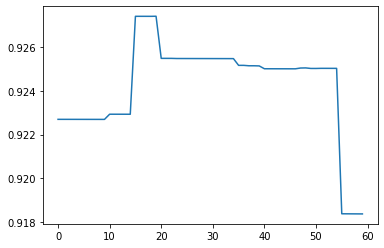

In [36]:
print(df[df["r2_adj"] == df["r2_adj"].max()])
df["r2_adj"].plot()

In [37]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [38]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      2      5 ... 263488 263489 263490], test: [     1      3      4 ... 263467 263476 263482], auc: 0.5971588675154845


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 263488 263489 263490], test: [    21     22     24 ... 263477 263480 263484], auc: 0.608613418939491


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      2 ... 263487 263488 263489], test: [     6     10     12 ... 263485 263486 263490], auc: 0.5999284563357752


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      3 ... 263486 263487 263490], test: [     2     11     15 ... 263483 263488 263489], auc: 0.6074473961993044
train: [     1      2      3 ... 263488 263489 263490], test: [     0      5      7 ... 263472 263475 263487], auc: 0.6063268894725369


Durchschnitt: 0.60
Standardabw.: 0.00
Varianz:      0.00


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Application Train & Bureau

In [39]:
bureau.head()

,SK_ID_CURR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)",TARGET
0,100002,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0,1
1,100003,-2586.0,-1873.5,-1205.5,-732.75,-606.0,0.0,0.0,0.0,0.0,0.0,-2434.0,-1013.50,-480.0,-11.00,1216.0,-2131.0,-1376.00,-621.0,-580.50,-540.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,22248.0,60051.37500,92576.25,286875.00,810000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202500.00000,810000.000,0.0,0.0,0.0,0.0,0.0,-2131.0,-945.25,-545.0,-415.75,-43.0,NaN,NaN,NaN,NaN,NaN,0
2,100004,-1326.0,-1096.5,-867.0,-637.50,-408.0,0.0,0.0,0.0,0.0,0.0,-595.0,-541.75,-488.5,-435.25,-382.0,-683.0,-607.75,-532.5,-457.25,-382.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,94500.0,94509.45000,94518.90,94528.35,94537.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-682.0,-607.00,-532.0,-457.00,-382.0,NaN,NaN,NaN,NaN,NaN,0
3,100007,-1149.0,-1149.0,-1149.0,-1149.00,-1149.0,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,-783.0,-783.00,-783.0,-783.00,-783.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,146250.0,146250.00000,146250.00,146250.00,146250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,NaN,NaN,NaN,NaN,NaN,0
4,100008,-1097.0,-1097.0,-1097.0,-587.50,-78.0,0.0,0.0,0.0,0.0,0.0,-853.0,-822.50,-792.0,-160.50,471.0,-1028.0,-968.50,-909.0,-849.50,-790.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,95134.5,100419.75000,105705.00,186655.50,267606.0,0.0,0.0,0.0,120028.5,240057.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-1027.0,-908.50,-790.0,-403.00,-16.0,NaN,NaN,NaN,NaN,NaN,0


In [40]:
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [41]:
m = app_train[["SK_ID_CURR","TARGET"] + m_heads]

In [42]:
len(m)

307511

In [43]:
bureau.head()

,SK_ID_CURR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)",TARGET
0,100002,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0,1
1,100003,-2586.0,-1873.5,-1205.5,-732.75,-606.0,0.0,0.0,0.0,0.0,0.0,-2434.0,-1013.50,-480.0,-11.00,1216.0,-2131.0,-1376.00,-621.0,-580.50,-540.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,22248.0,60051.37500,92576.25,286875.00,810000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202500.00000,810000.000,0.0,0.0,0.0,0.0,0.0,-2131.0,-945.25,-545.0,-415.75,-43.0,NaN,NaN,NaN,NaN,NaN,0
2,100004,-1326.0,-1096.5,-867.0,-637.50,-408.0,0.0,0.0,0.0,0.0,0.0,-595.0,-541.75,-488.5,-435.25,-382.0,-683.0,-607.75,-532.5,-457.25,-382.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,94500.0,94509.45000,94518.90,94528.35,94537.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-682.0,-607.00,-532.0,-457.00,-382.0,NaN,NaN,NaN,NaN,NaN,0
3,100007,-1149.0,-1149.0,-1149.0,-1149.00,-1149.0,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,-783.0,-783.00,-783.0,-783.00,-783.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,146250.0,146250.00000,146250.00,146250.00,146250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-783.0,-783.00,-783.0,-783.00,-783.0,NaN,NaN,NaN,NaN,NaN,0
4,100008,-1097.0,-1097.0,-1097.0,-587.50,-78.0,0.0,0.0,0.0,0.0,0.0,-853.0,-822.50,-792.0,-160.50,471.0,-1028.0,-968.50,-909.0,-849.50,-790.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,95134.5,100419.75000,105705.00,186655.50,267606.0,0.0,0.0,0.0,120028.5,240057.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,-1027.0,-908.50,-790.0,-403.00,-16.0,NaN,NaN,NaN,NaN,NaN,0


In [44]:
bureau = bureau.drop(["TARGET"], axis=1)

In [45]:
t = m.merge(bureau, on="SK_ID_CURR")

In [46]:
t = t.drop(["SK_ID_CURR"], axis=1)

In [47]:
t.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)"
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

model = RandomForestClassifier(max_depth=7, random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

model.fit(x,y)

RandomForestClassifier(max_depth=7, random_state=0)

In [50]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef
    
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))

In [51]:
heads = list(d.keys())

In [52]:
df = t

data = {
        "r2":[],
        "r2_adj":[],
        "p" : [],
        "n": []
       }

for q in range(len(heads)):
    X = df[heads[:q+1] + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    
    reg = LogisticRegression(max_iter=500).fit(x, y)
    n = len(X)
    p = len(X.columns)

    r2 = reg.score(x, y)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

    data["r2"].append(r2)
    data["r2_adj"].append(r2_adj)
    data["p"].append(p)
    data["n"].append(n)

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from rag

In [53]:
df = pd.DataFrame(data)

          r2    r2_adj   p      n
42  0.936466  0.936397  44  40262


<AxesSubplot:>

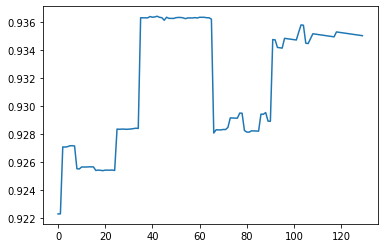

In [54]:
print(df[df["r2_adj"] == df["r2_adj"].max()])
df["r2_adj"].plot()

In [55]:
df

,r2,r2_adj,p,n
0,0.922301,0.922300,2,245202
1,0.922304,0.922303,3,244774
2,0.927079,0.927076,4,109159
3,0.927070,0.927066,5,109159
4,0.927097,0.927093,6,109159
5,0.927161,0.927157,7,109159
6,0.927170,0.927165,8,109159
7,0.927152,0.927146,9,109159
8,0.925530,0.925520,10,79065
9,0.925517,0.925507,11,79065


In [56]:
t.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)"
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.

In [57]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [58]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      2      5 ... 263488 263489 263490], test: [     1      3      4 ... 263467 263476 263482], auc: 0.6409977715643085
train: [     0      1      2 ... 263488 263489 263490], test: [    21     22     24 ... 263477 263480 263484], auc: 0.6531670061532471
train: [     0      1      2 ... 263487 263488 263489], test: [     6     10     12 ... 263485 263486 263490], auc: 0.6452088324586198


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: [     0      1      3 ... 263486 263487 263490], test: [     2     11     15 ... 263483 263488 263489], auc: 0.6477951300205295
train: [     1      2      3 ... 263488 263489 263490], test: [     0      5      7 ... 263472 263475 263487], auc: 0.6490102106039191


Durchschnitt: 0.65
Standardabw.: 0.00
Varianz:      0.00


c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
t.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)","(AMT_CREDIT_MAX_OVERDUE, 0.0)","(AMT_CREDIT_MAX_OVERDUE, 0.25)","(AMT_CREDIT_MAX_OVERDUE, 0.5)","(AMT_CREDIT_MAX_OVERDUE, 0.75)","(AMT_CREDIT_MAX_OVERDUE, 1.0)","(CNT_CREDIT_PROLONG, 0.0)","(CNT_CREDIT_PROLONG, 0.25)","(CNT_CREDIT_PROLONG, 0.5)","(CNT_CREDIT_PROLONG, 0.75)","(CNT_CREDIT_PROLONG, 1.0)","(AMT_CREDIT_SUM, 0.0)","(AMT_CREDIT_SUM, 0.25)","(AMT_CREDIT_SUM, 0.5)","(AMT_CREDIT_SUM, 0.75)","(AMT_CREDIT_SUM, 1.0)","(AMT_CREDIT_SUM_DEBT, 0.0)","(AMT_CREDIT_SUM_DEBT, 0.25)","(AMT_CREDIT_SUM_DEBT, 0.5)","(AMT_CREDIT_SUM_DEBT, 0.75)","(AMT_CREDIT_SUM_DEBT, 1.0)","(AMT_CREDIT_SUM_LIMIT, 0.0)","(AMT_CREDIT_SUM_LIMIT, 0.25)","(AMT_CREDIT_SUM_LIMIT, 0.5)","(AMT_CREDIT_SUM_LIMIT, 0.75)","(AMT_CREDIT_SUM_LIMIT, 1.0)","(AMT_CREDIT_SUM_OVERDUE, 0.0)","(AMT_CREDIT_SUM_OVERDUE, 0.25)","(AMT_CREDIT_SUM_OVERDUE, 0.5)","(AMT_CREDIT_SUM_OVERDUE, 0.75)","(AMT_CREDIT_SUM_OVERDUE, 1.0)","(DAYS_CREDIT_UPDATE, 0.0)","(DAYS_CREDIT_UPDATE, 0.25)","(DAYS_CREDIT_UPDATE, 0.5)","(DAYS_CREDIT_UPDATE, 0.75)","(DAYS_CREDIT_UPDATE, 1.0)","(AMT_ANNUITY, 0.0)","(AMT_ANNUITY, 0.25)","(AMT_ANNUITY, 0.5)","(AMT_ANNUITY, 0.75)","(AMT_ANNUITY, 1.0)"
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,-1185.0,-939.00,-402.5,-31.50,-7.0,0.0,0.0,0.0,0.0,0.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.

In [60]:
heads = list(d.keys())

In [ ]:
df = t

data = {
        "r2":[],
        "r2_adj":[],
        "p" : [],
        "n": []
       }

temp = 0

h = []

for head in heads:
    
    h.append(head)
    
    X = df[h + ["TARGET"]]
    X = X.dropna()
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    
    reg = LogisticRegression(max_iter=500).fit(x, y)
    n = len(X)
    p = len(X.columns)

    r2 = reg.score(x, y)
    r2_adj = 1-(1-r2)*(n-1)/(n-p-1)
    
    if r2_adj > temp:

        data["r2"].append(r2)
        data["r2_adj"].append(r2_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        temp = r2_adj
    
    else:
        h.remove(head)
        

          r2    r2_adj   p      n
29  0.944585  0.944467  31  14617


<AxesSubplot:>

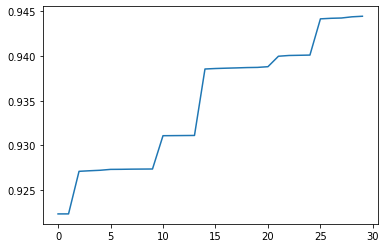

In [62]:
df = pd.DataFrame(data)

print(df[df["r2_adj"] == df["r2_adj"].max()])
df["r2_adj"].plot()

In [63]:
df

,r2,r2_adj,p,n
0,0.922301,0.922300,2,245202
1,0.922304,0.922303,3,244774
2,0.927079,0.927076,4,109159
3,0.927143,0.927140,5,109159
4,0.927198,0.927194,6,109159
5,0.927299,0.927294,7,108416
6,0.927308,0.927302,8,108416
7,0.927326,0.927320,9,108416
8,0.927335,0.927329,10,108416
9,0.927345,0.927337,11,108416


In [64]:
h

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 ('DAYS_CREDIT', 0.25),
 ('DAYS_CREDIT_ENDDATE', 0.5),
 ('DAYS_CREDIT_UPDATE', 0.75),
 'DAYS_EMPLOYED',
 ('DAYS_CREDIT_ENDDATE', 0.75),
 ('AMT_CREDIT_SUM', 0.0),
 ('DAYS_ENDDATE_FACT', 0.0),
 ('DAYS_ENDDATE_FACT', 0.25),
 ('AMT_CREDIT_SUM_OVERDUE', 0.75),
 'DAYS_ID_PUBLISH',
 'TOTALAREA_MODE',
 ('DAYS_CREDIT_UPDATE', 1.0),
 ('AMT_CREDIT_SUM', 0.75),
 'APARTMENTS_MODE',
 'FLOORSMAX_AVG',
 'AMT_INCOME_TOTAL',
 'ENTRANCES_AVG',
 'BASEMENTAREA_AVG',
 'ELEVATORS_MODE',
 'BASEMENTAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OWN_CAR_AGE',
 'CNT_CHILDREN',
 ('AMT_CREDIT_SUM_LIMIT', 0.5),
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [65]:
t = t[["TARGET"] + h]

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [66]:
y = t["TARGET"]
x = t.drop(["TARGET"], axis=1)

In [68]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [     0      2      5 ... 263488 263489 263490], test: [     1      3      4 ... 263467 263476 263482], auc: 0.614797254418397
train: [     0      1      2 ... 263488 263489 263490], test: [    21     22     24 ... 263477 263480 263484], auc: 0.6268708124654934
train: [     0      1      2 ... 263487 263488 263489], test: [     6     10     12 ... 263485 263486 263490], auc: 0.6183530492805138
train: [     0      1      3 ... 263486 263487 263490], test: [     2     11     15 ... 263483 263488 263489], auc: 0.6236264698572218
train: [     1      2      3 ... 263488 263489 263490], test: [     0      5      7 ... 263472 263475 263487], auc: 0.6259327660504801


Durchschnitt: 0.62
Standardabw.: 0.00
Varianz:      0.00
